In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3256,ham,"No, but you told me you were going, before you...",NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
1244,ham,Now? I'm going out 4 dinner soon..,NaN,NaN,NaN
2281,ham,"I hav almost reached. Call, i m unable to conn...",NaN,NaN,NaN
3277,ham,What happened in interview?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# data cleaning
#EDA
# Text Processing
# Model Building
# Evaluation
# Improvement
# Website
# Deployment

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last three columns as they have few non null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4822,ham,:-) :-)
2392,ham,"Thanks da thangam, i feel very very happy dear..."
2431,ham,That's good. Lets thank God. Please complete t...
4533,ham,I have no money 4 steve mate! !
4311,ham,I keep ten rs in my shelf:) buy two egg.


In [9]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [10]:
df.sample(5)

,Target,Text
3034,ham,Raji..pls do me a favour. Pls convey my Birthd...
1980,ham,"Sorry, I'll call later"
3336,ham,I AM AT THE GAS STATION. GO THERE.
2602,ham,So when you gonna get rimac access
4090,ham,Hey doc pls I want to get nice t shirt for my ...


In [11]:
!pip install scikit-learn --user


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Target']=encoder.fit_transform(df['Target'])

In [14]:
df.sample(5)

,Target,Text
106,0,"Aight, I'll hit you up when I get some cash"
1308,0,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.
5355,0,Living is very simple.. Loving is also simple....
1965,0,Thanks. It was only from tescos but quite nice...
5259,0,Can help u swoop by picking u up from wherever...


In [15]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
# checking duplicate values
df.duplicated().sum()

403

In [18]:
#means 403 values are duplicate and now we have to remove them.

In [19]:
# removing duplicates
df=df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## EDA

In [22]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

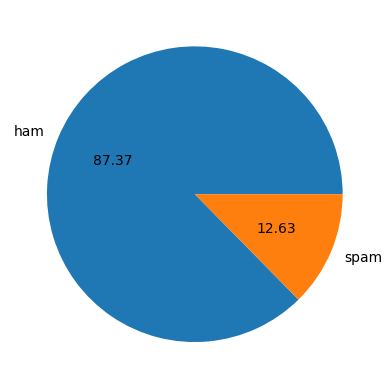

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
# count number of character in each msg
df['num_characters']=df['Text'].apply(len)

In [28]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# count number of words in each messages
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
#from nltk.tokenize import word_tokenize

In [31]:
#word_tokenize("This is test message")

In [32]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
#number of sentences in each message
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
hamdf=df[df['Target']==0]

In [37]:
hamdf[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# for spam
spamdf=df[df['Target']==1]

In [39]:
spamdf[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
# we have seen that ham messages have less characters as compare to spam messages.
# So now we are going to visualize it through plots

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

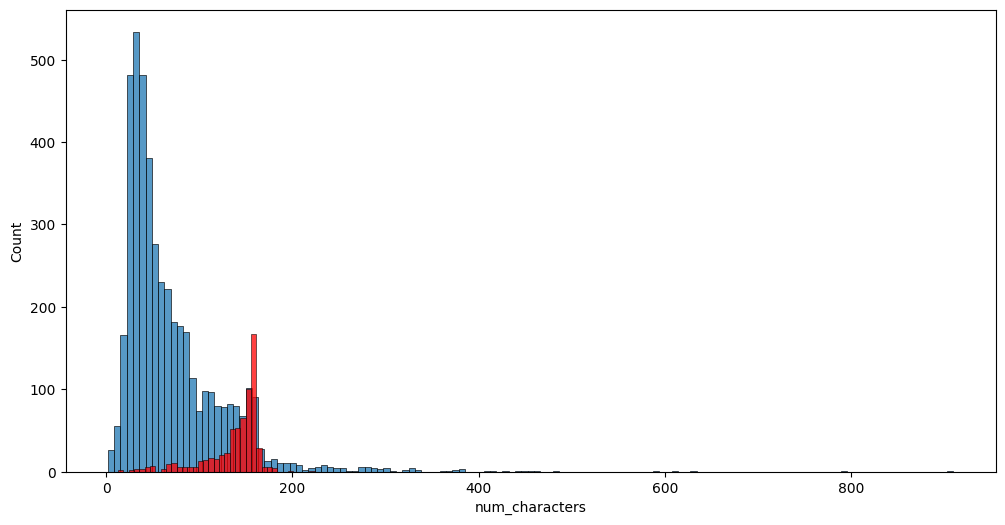

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(hamdf['num_characters'])
sns.histplot(spamdf['num_characters'],color='red')

In [43]:
# from above plot we comes to understand that max no. of ham messages have less number of characters and max numbers of spam messages have max number of characters

<AxesSubplot:xlabel='num_words', ylabel='Count'>

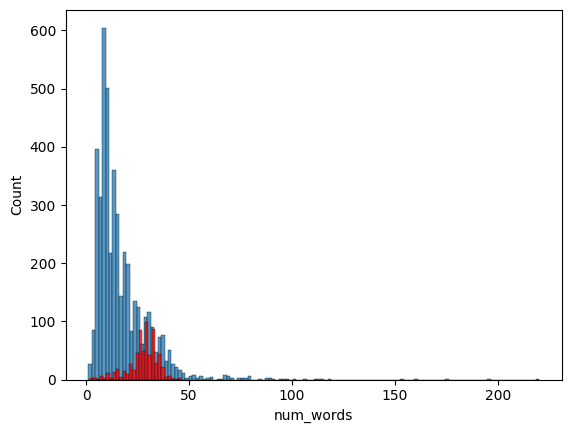

In [44]:
#now we will see it with words and sentences
sns.histplot(hamdf['num_words'])
sns.histplot(spamdf['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

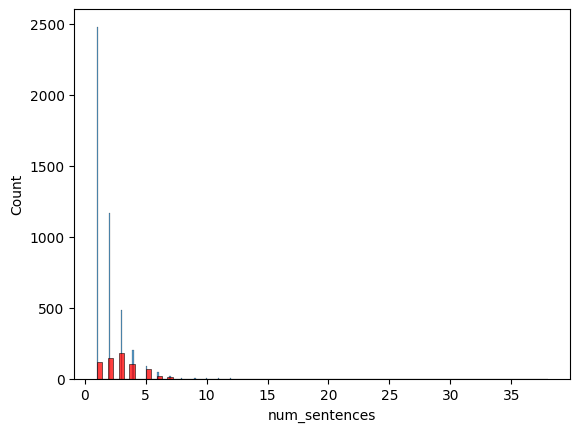

In [45]:
sns.histplot(hamdf['num_sentences'])
sns.histplot(spamdf['num_sentences'],color='red')

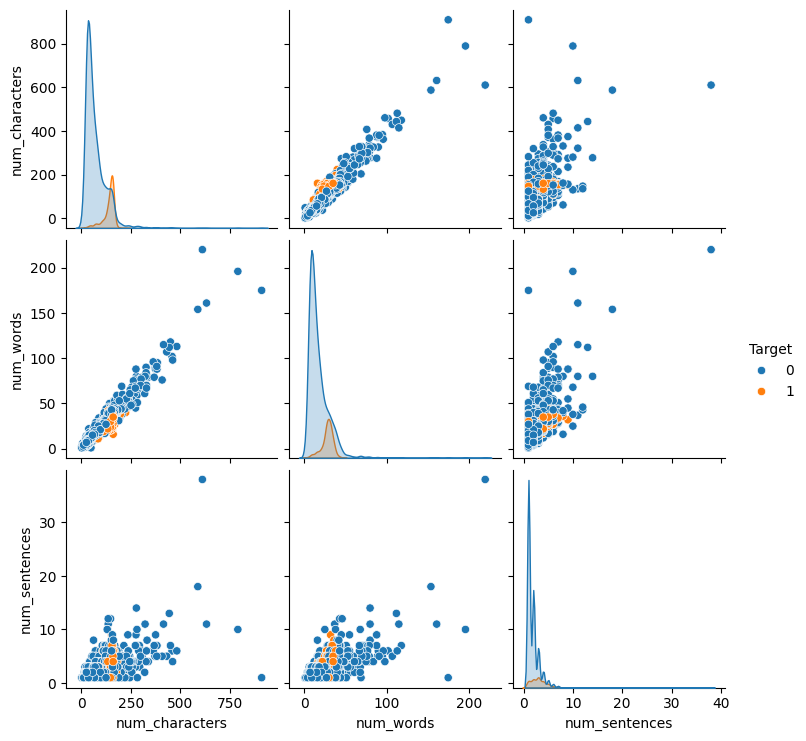

In [46]:
sns.pairplot(df,hue='Target')

In [47]:
df[['Target','num_characters','num_words','num_sentences']].corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

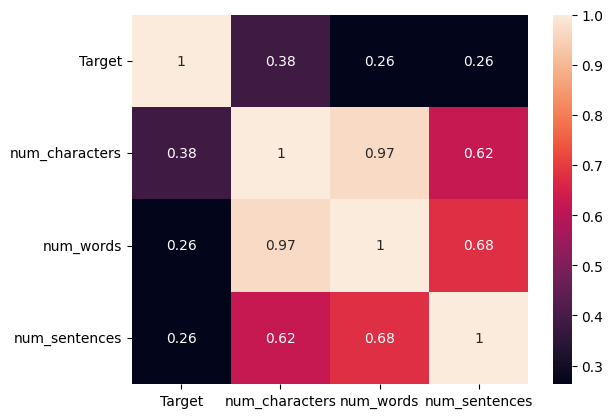

In [48]:
sns.heatmap(df[['Target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [49]:
# now we are going to do data preprocessing

## DATA PREPROCESSING
##lower case
##tokenization
##remove special characters
##remove stopwords and punctuations
##stemming

In [50]:
# for this we will crete a function that will perform all these functionality at once


In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [52]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [55]:
def text_transform(text):
    #change in lower case
    text=text.lower()
    #Tokenize or split 
    text=nltk.word_tokenize(text)
    y = []
    #Removing special characters
    for i in text:
        if i.isalnum():
         y.append(i)
    # clear y list to use it again
    text=y[:]
    y.clear()
    # remove stopwords and punctuation
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    #Stemming
    for i in text :
      y.append(ps.stem(i))
    
    return " ".join(y)
    

In [56]:
df['Text'][3]

'U dun say so early hor... U c already then say...'

In [57]:
text_transform('U dun say so early hor... U c already then say...')

'u dun say earli hor u c alreadi say'

In [58]:
df['Transformed_text']=df['Text'].apply(text_transform)

In [59]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [61]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))

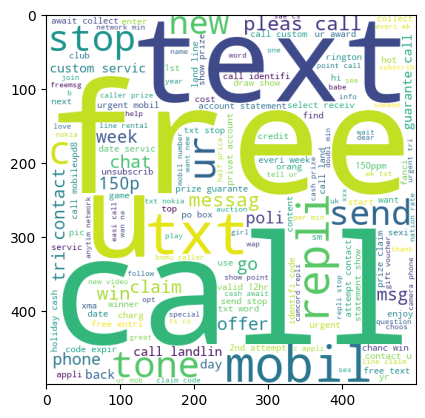

In [62]:
plt.imshow(spam_wc)

In [63]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=" "))

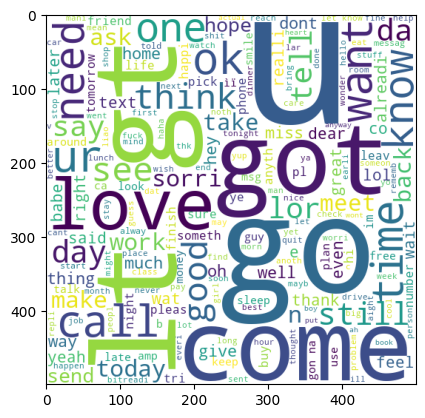

In [64]:
plt.imshow(ham_wc)

In [65]:
## now we will see top 30 words used in ham and spam

In [66]:
df[df['Target']==0]['Transformed_text'].tolist()
##here we created list having a message as an element of list

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [67]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [68]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [69]:
len(spam_corpus)

9939

In [70]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [71]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [72]:
#lets convert it into dataframe
frequent_spamwords_df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Word','Frequency'])

In [73]:
frequent_spamwords_df

,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


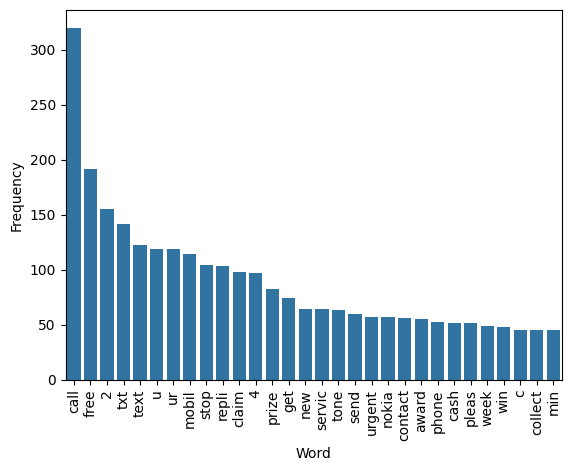

In [74]:
sns.barplot(x=frequent_spamwords_df['Word'],y=frequent_spamwords_df['Frequency'])

plt.xticks(rotation='vertical')
plt.show()

In [75]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [76]:
len(ham_corpus)

35404

In [77]:
frequent_hamwords_df=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Word','Frequency'])

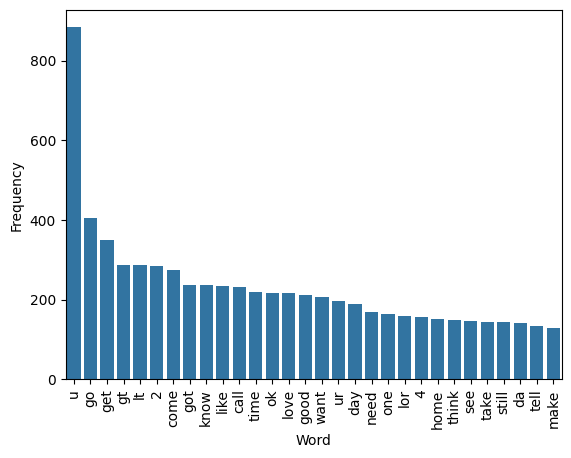

In [78]:
sns.barplot(x=frequent_hamwords_df['Word'],y=frequent_hamwords_df['Frequency'])

plt.xticks(rotation='vertical')
plt.show()

##  MODEL BUILDING 

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [80]:
x = cv.fit_transform(df['Transformed_text']).toarray()

In [81]:
y=df['Target'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
#objext creation
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [87]:
#traning  gnb model using trainig data
gnb.fit(x_train,y_train)

GaussianNB()

In [88]:
#prediction on input testing data(x_test)
y_pred1=gnb.predict(x_test)


In [89]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [90]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [242]:
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [92]:
#till now bernoulliNB gave best result lets go ahesd

In [93]:
#now will do same with TF-IDF Vectorizer..

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [136]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

In [207]:
x = tfidf.fit_transform(df['Transformed_text']).toarray()

In [137]:
# x=scaler.fit_transform(x)

In [179]:
# appending num_character column to x
# x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [208]:
y=df['Target'].values

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [210]:
gnb.fit(x_train,y_train)

GaussianNB()

In [211]:
y_pred1=gnb.predict(x_test)


In [212]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [213]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [214]:
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [215]:
# now we are trying other algorithms

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [217]:
# creating objects

In [218]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [223]:
#### improvements Voting Classifier
# svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
# mnb=MultinomialNB()
# etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
# from sklearn.ensemble import VotingClassifier

In [224]:
# voting =  VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [226]:
# voting.fit(x_train,y_train)
# y_predd=voting.predict(x_test)
# print(accuracy_score(y_test,y_predd))
# print(confusion_matrix(y_test,y_predd))
# print(precision_score(y_test,y_predd))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [228]:
## the precision score decreased so we will comment it out and will use stacking
## APPLYING STACKING
# estimators=[('svm',svc),('nb',mnb),('et',etc)]
# final_estimator=RandomForestClassifier()

In [229]:
# from sklearn.ensemble import StackingClassifier

In [232]:
# stacking= StackingClassifier(estimators=estimators,final_estimator=final_estimator)


In [236]:
 # stacking.fit(x_train,y_train)
 # y_predd=stacking.predict(x_test)
 # print(accuracy_score(y_test,y_predd))
 # print(confusion_matrix(y_test,y_predd))
 # print(precision_score(y_test,y_predd))

0.9806576402321083
[[889   7]
 [ 13 125]]
0.946969696969697


In [ ]:
## we have seen both scores decremented so we will comment it out

In [219]:
# now we are going to create dictionary where key would be name of algo and value would we ots object
clsfs={
    'SVC':svc,
    'KNC':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AB':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [220]:
# creating function to train model and return accuracy and precision score
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision


In [221]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [222]:
# Now we will run loop on dictionary and store each accuracy and precision in list
accuracy_list=[]
precision_list=[]
for name,clf in clsfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KNC
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AB
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [176]:
# create a dataframe for it
performance_df=pd.DataFrame({'Algorithms':clsfs.keys(),'Accuracy':accuracy_list,'Precisions':precision_list}).sort_values('Precisions',ascending=False)

In [177]:
performance_df


,Algorithms,Accuracy,Precisions
1,KNC,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AB,0.924565,0.848837


In [113]:
performance_df1=pd.melt(performance_df,id_vars=['Algorithms'])

In [114]:
performance_df1

,Algorithms,variable,value
0,KNC,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.937137


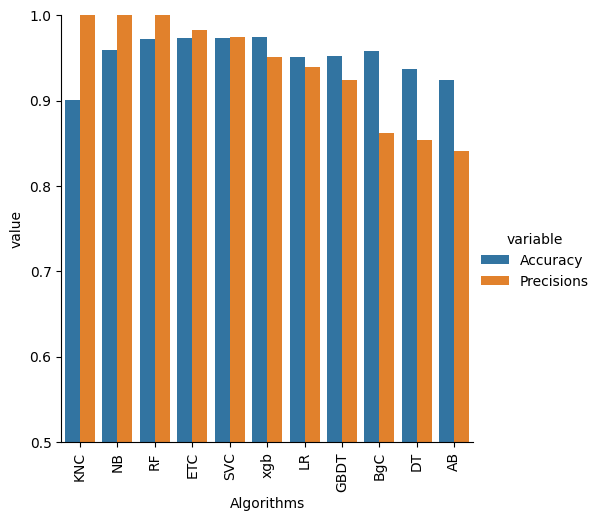

In [115]:
#now we will plot a graph for pictorial visualization to compare the  algos
sns.catplot(x='Algorithms',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

In [133]:
# USED MAX_FEATURES FEATURE IN TFIDF VECTORIZER
temp_df=pd.DataFrame({'Algorithms':clsfs.keys(),'Accuracy_ft_3000':accuracy_list,'Precisions_ft_3000':precision_list}).sort_values('Precisions_ft_3000',ascending=False)

In [156]:
new_df=performance_df.merge(temp_df,on='Algorithms')

In [157]:
new_df

,Algorithms,Accuracy,Precisions,Accuracy_ft_3000,Precisions_ft_3000
0,KNC,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,xgb,0.974855,0.951613,0.967118,0.948276
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.952611,0.923810,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217
9,DT,0.937137,0.854369,0.932302,0.833333


In [154]:
# USING SCALING NOW .
scale_df=pd.DataFrame({'Algorithms':clsfs.keys(),'Accuracy_scale':accuracy_list,'Precisions_scale':precision_list}).sort_values('Precisions_scale',ascending=False)

In [194]:
new_df1=new_df.merge(scale_df,on='Algorithms')

In [195]:
new_df1

,Algorithms,Accuracy,Precisions,Accuracy_ft_3000,Precisions_ft_3000,Accuracy_scale,Precisions_scale
0,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,xgb,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
9,DT,0.937137,0.854369,0.932302,0.833333,0.928433,0.820000


In [178]:
# as we have seen results are not that good so we will comment the changes

In [203]:
# now we are adding the num_character column and see whhat changes occurs to the model trainnig
addcol_df=pd.DataFrame({'Algorithms':clsfs.keys(),'Accuracy_addcol':accuracy_list,'Precisions_addcol':precision_list}).sort_values('Precisions_addcol',ascending=False)

In [204]:
new_df2=addcol_df.merge(new_df1,on='Algorithms')

In [205]:
new_df2

,Algorithms,Accuracy_addcol,Precisions_addcol,Accuracy,Precisions,Accuracy_ft_3000,Precisions_ft_3000,Accuracy_scale,Precisions_scale
0,NB,0.941006,1.000000,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
1,RF,0.969052,0.981818,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
2,ETC,0.978723,0.975410,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
3,LR,0.961315,0.962264,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
4,xgb,0.970019,0.949580,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276
5,GBDT,0.950677,0.930693,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
6,AB,0.946809,0.902913,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837
7,BgC,0.966151,0.899225,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
8,DT,0.944874,0.878505,0.937137,0.854369,0.932302,0.833333,0.928433,0.820000
9,KNC,0.933269,0.822430,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190


In [206]:
# we have seen adding column has actually decreased the accuracy so we will comment gthe changes

In [237]:
# the next step is using voting classifier where we combine our best models.

In [243]:
# Saving the models and vectorizer objects in the file
import pickle

In [245]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))